In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Ranking

In [158]:
def read_csv(policy_name, dir, is_SB, case, file_or_folder):
    dataframes = []
    filenames = []

    for root, dirs, files in os.walk(dir):
        # Filter directories within the root directory
        dirs[:] = [d for d in dirs if d.startswith(policy_name) or policy_name == 'all']
        # Only proceed if we're in a directory that matches the folder prefix
        if os.path.basename(root).startswith(policy_name) or policy_name == 'all':
            # Loop through each file in the directory
            for file in files:
                # Check if file starts with the prefix
                all_boolean = (case == 'all') and any(file.startswith(word) for word in ['Base', 'Collab', 'Do_Nothing', 'FF_'])
                if file.startswith(case) or all_boolean:
                    file_path = os.path.join(root, file)
                    try:
                        # Load the file into a DataFrame
                        df = pd.read_csv(file_path)
                        # Store the DataFrame in the dictionary using the path as a key
                        dataframes.append(df)
                        filename = os.path.basename(root) if file_or_folder == 'folder' else file
                        filenames.append(filename)
                    except Exception as e:
                        print(f"Failed to read {file_path}: {e}")
    columns_sb = ['Bike Arrivals', 'Bike Starvations', 'Long Congestions']
    
    columns_ff = ['Escooter Arrivals', 'Escooter Starvations', 'Battery Starvations', 'Battery Violations', 'num battery swaps']
    columns_sol_time = ['Accumulated solution time', 'Number of get_best_action']
    
    fix_dfs = []
    for df in dataframes:
        if case.startswith('sol_time'):
            selected_columns = columns_sol_time 
        elif is_SB:
            selected_columns = columns_sb
        else:
            selected_columns = columns_ff
        
        fix_dfs.append(df[selected_columns])
    return fix_dfs, filenames

In [96]:
def make_pie(column_means):
    # Calculate the percentage contribution of each column's mean
    total_means = column_means.sum()
    percentage_means = (column_means / total_means) * 100

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))  # Adjust the figure size as necessary
    plt.pie(percentage_means, labels=percentage_means.index, autopct='%1.1f%%', startangle=90)
    
    plt.show()

### Rank the results

In [159]:
use_mean = False
dir = '/Users/isabellam/NTNU/H2023/Prosjektoppgave/fomo/policies/hlv_master/results/results_thresholds'
dataframes, filenames = read_csv('Base', dir, False, 'swap_', 'file')
filenames

KeyError: "['num battery swaps'] not in index"

In [110]:
means = []
for i in range(len(dataframes)):
    dataframe = dataframes[i]
    filename = filenames[i]
    
    mean_series = dataframe.mean() if use_mean else dataframe.iloc[0]
    mean_series['Filename'] = filename
    means.append(mean_series)

new_df = pd.DataFrame(means)
new_df['Sum'] = new_df.drop(columns=['Filename', 'Escooter Arrivals']).sum(axis=1)
new_df['Lost trips percentage'] = round(new_df['Sum'] / new_df[['Escooter Arrivals', 'Sum']].sum(axis=1) * 100, 2)
new_df['Rank failed events'] = new_df['Sum'].rank(method='min')
new_df['Rank p'] = new_df['Lost trips percentage'].rank(method='min')

new_column_order = ['Filename', 'Escooter Arrivals', 'Escooter Starvations', 'Battery Starvations', 'Battery Violations', 'Sum', 'Lost trips percentage', 'Rank failed events', 'Rank p']
new_df = new_df[new_column_order]
new_df = new_df.sort_values('Filename')

new_df

,Filename,Escooter Arrivals,Escooter Starvations,Battery Starvations,Battery Violations,Sum,Lost trips percentage,Rank failed events,Rank p
0,num_vehicles_1_Collab3.csv,13469,17133,10296,0,27429,67.07,6.0,6.0
0,num_vehicles_2_Collab3.csv,15988,16469,8388,0,24857,60.86,5.0,5.0
0,num_vehicles_3_Collab3.csv,20213,15248,5542,0,20790,50.70,4.0,4.0
0,num_vehicles_4_Collab3.csv,21603,14480,4677,0,19157,47.00,3.0,3.0
0,num_vehicles_5_Collab3.csv,22122,14951,3787,0,18738,45.86,2.0,2.0
0,num_vehicles_6_Collab3.csv,25141,13075,2179,0,15254,37.76,1.0,1.0


### SB TABLE

In [112]:
dataframes2, filenames2 = read_csv('Collab', dir, True, 'num_vehicles', 'file')

means2 = []
for i in range(len(dataframes2)):
    dataframe2 = dataframes2[i]
    filename2 = filenames2[i]
    
    mean_series2 = dataframe2.mean()
    mean_series2['Filename'] = filename2
    means2.append(mean_series2)

new_df2 = pd.DataFrame(means2)
new_df2['Sum'] = new_df2.drop(columns=['Filename', 'Bike Arrivals']).sum(axis=1)
new_df2['Lost trips percentage'] = round(new_df2['Sum'] / new_df2[['Bike Arrivals', 'Sum']].sum(axis=1) * 100, 2)
new_df2['Rank failed events'] = new_df2['Sum'].rank(method='min')
new_df2['Rank p'] = new_df2['Lost trips percentage'].rank(method='min')

new_column_order2 = ['Filename', 'Bike Arrivals', 'Bike Starvations', 'Long Congestions', 'Sum', 'Lost trips percentage', 'Rank failed events', 'Rank p']
new_df2 = new_df2[new_column_order2]
new_df2 = new_df2.sort_values('Filename')

new_df2

,Filename,Bike Arrivals,Bike Starvations,Long Congestions,Sum,Lost trips percentage,Rank failed events,Rank p
2,num_vehicles_1_Collab3.csv,11739.421053,119.157895,2084.473684,2203.631579,15.80,6.0,6.0
0,num_vehicles_2_Collab3.csv,11748.631579,100.894737,1279.631579,1380.526316,10.51,5.0,5.0
4,num_vehicles_3_Collab3.csv,11759.000000,93.105263,829.368421,922.473684,7.27,4.0,4.0
1,num_vehicles_4_Collab3.csv,11793.000000,90.842105,531.210526,622.052632,5.01,3.0,3.0
5,num_vehicles_5_Collab3.csv,11720.684211,78.368421,380.000000,458.368421,3.76,2.0,2.0
3,num_vehicles_6_Collab3.csv,11765.052632,76.736842,315.368421,392.105263,3.23,1.0,1.0


In [113]:
merged_df = pd.merge(new_df, new_df2, on='Filename', how='inner')
df = merged_df
df['Rank sum'] = df['Rank failed events_x'] +df['Rank failed events_y']
df

,Filename,Escooter Arrivals,Escooter Starvations,Battery Starvations,Battery Violations,Sum_x,Lost trips percentage_x,Rank failed events_x,Rank p_x,Bike Arrivals,Bike Starvations,Long Congestions,Sum_y,Lost trips percentage_y,Rank failed events_y,Rank p_y,Rank sum
0,num_vehicles_1_Collab3.csv,13469,17133,10296,0,27429,67.07,6.0,6.0,11739.421053,119.157895,2084.473684,2203.631579,15.80,6.0,6.0,12.0
1,num_vehicles_2_Collab3.csv,15988,16469,8388,0,24857,60.86,5.0,5.0,11748.631579,100.894737,1279.631579,1380.526316,10.51,5.0,5.0,10.0
2,num_vehicles_3_Collab3.csv,20213,15248,5542,0,20790,50.70,4.0,4.0,11759.000000,93.105263,829.368421,922.473684,7.27,4.0,4.0,8.0
3,num_vehicles_4_Collab3.csv,21603,14480,4677,0,19157,47.00,3.0,3.0,11793.000000,90.842105,531.210526,622.052632,5.01,3.0,3.0,6.0
4,num_vehicles_5_Collab3.csv,22122,14951,3787,0,18738,45.86,2.0,2.0,11720.684211,78.368421,380.000000,458.368421,3.76,2.0,2.0,4.0
5,num_vehicles_6_Collab3.csv,25141,13075,2179,0,15254,37.76,1.0,1.0,11765.052632,76.736842,315.368421,392.105263,3.23,1.0,1.0,2.0


In [114]:
df['Final Rank'] = df[['Rank p_x', 'Rank p_y']].max(axis=1)
df

,Filename,Escooter Arrivals,Escooter Starvations,Battery Starvations,Battery Violations,Sum_x,Lost trips percentage_x,Rank failed events_x,Rank p_x,Bike Arrivals,Bike Starvations,Long Congestions,Sum_y,Lost trips percentage_y,Rank failed events_y,Rank p_y,Rank sum,Final Rank
0,num_vehicles_1_Collab3.csv,13469,17133,10296,0,27429,67.07,6.0,6.0,11739.421053,119.157895,2084.473684,2203.631579,15.80,6.0,6.0,12.0,6.0
1,num_vehicles_2_Collab3.csv,15988,16469,8388,0,24857,60.86,5.0,5.0,11748.631579,100.894737,1279.631579,1380.526316,10.51,5.0,5.0,10.0,5.0
2,num_vehicles_3_Collab3.csv,20213,15248,5542,0,20790,50.70,4.0,4.0,11759.000000,93.105263,829.368421,922.473684,7.27,4.0,4.0,8.0,4.0
3,num_vehicles_4_Collab3.csv,21603,14480,4677,0,19157,47.00,3.0,3.0,11793.000000,90.842105,531.210526,622.052632,5.01,3.0,3.0,6.0,3.0
4,num_vehicles_5_Collab3.csv,22122,14951,3787,0,18738,45.86,2.0,2.0,11720.684211,78.368421,380.000000,458.368421,3.76,2.0,2.0,4.0,2.0
5,num_vehicles_6_Collab3.csv,25141,13075,2179,0,15254,37.76,1.0,1.0,11765.052632,76.736842,315.368421,392.105263,3.23,1.0,1.0,2.0,1.0


### Merge with solution time

In [115]:
dataframes2, filenames2 = read_csv('Collab3', dir, True, 'sol_time', 'file')
filenames2

['sol_time_num_vehicles_2_Collab3.csv',
 'sol_time_num_vehicles_4_Collab3.csv',
 'sol_time_num_vehicles_1_Collab3.csv',
 'sol_time_num_vehicles_6_Collab3.csv',
 'sol_time_num_vehicles_3_Collab3.csv',
 'sol_time_num_vehicles_5_Collab3.csv']

In [116]:
import numpy as np

means2 = []
for i in range(len(dataframes2)):
    dataframe2 = dataframes2[i]
    filename2 = filenames2[i]
    
    mean_series2 = dataframe2.mean()
    mean_series2['Filename'] = filename2[9:]
    means2.append(mean_series2)

new_df2 = pd.DataFrame(means2)

new_df2['avg_solution_time'] = new_df2['Accumulated solution time'].astype(float) / new_df2['Number of get_best_action'].replace(0, np.nan).astype(float)

new_df2['Rank sol_time'] = new_df2['avg_solution_time'].rank(method='min')

new_column_order1 = ['Filename', 'Accumulated solution time', 'Number of get_best_action', 'avg_solution_time', 'Rank sol_time']
new_df2 = new_df2[new_column_order1]
new_df2 = new_df2.sort_values('Filename')

new_df2

,Filename,Accumulated solution time,Number of get_best_action,avg_solution_time,Rank sol_time
2,num_vehicles_1_Collab3.csv,1090.125473,468.263158,2.328019,1.0
0,num_vehicles_2_Collab3.csv,2389.564303,908.947368,2.628936,2.0
4,num_vehicles_3_Collab3.csv,4330.619780,1374.631579,3.150386,3.0
1,num_vehicles_4_Collab3.csv,6939.019333,1856.578947,3.737530,4.0
5,num_vehicles_5_Collab3.csv,10589.477732,2347.578947,4.510808,5.0
3,num_vehicles_6_Collab3.csv,15321.756530,2802.315789,5.467534,6.0


In [117]:
merged_df = pd.merge(new_df, new_df2, on='Filename', how='inner')
df = merged_df
df

,Filename,Escooter Arrivals,Escooter Starvations,Battery Starvations,Battery Violations,Sum,Lost trips percentage,Rank failed events,Rank p,Accumulated solution time,Number of get_best_action,avg_solution_time,Rank sol_time
0,num_vehicles_1_Collab3.csv,13469,17133,10296,0,27429,67.07,6.0,6.0,1090.125473,468.263158,2.328019,1.0
1,num_vehicles_2_Collab3.csv,15988,16469,8388,0,24857,60.86,5.0,5.0,2389.564303,908.947368,2.628936,2.0
2,num_vehicles_3_Collab3.csv,20213,15248,5542,0,20790,50.70,4.0,4.0,4330.619780,1374.631579,3.150386,3.0
3,num_vehicles_4_Collab3.csv,21603,14480,4677,0,19157,47.00,3.0,3.0,6939.019333,1856.578947,3.737530,4.0
4,num_vehicles_5_Collab3.csv,22122,14951,3787,0,18738,45.86,2.0,2.0,10589.477732,2347.578947,4.510808,5.0
5,num_vehicles_6_Collab3.csv,25141,13075,2179,0,15254,37.76,1.0,1.0,15321.756530,2802.315789,5.467534,6.0


### Branching

In [67]:
list_filename = df['Filename'].str.split('_')
df['a'] = list_filename.str[2]
df['b'] = list_filename.str[4]
df

,Filename,Escooter Arrivals,Escooter Starvations,Battery Starvations,Battery Violations,Sum,Lost trips percentage,Rank failed events,Rank p,Accumulated solution time,Number of get_best_action,avg_solution_time,Rank sol_time,a,b
0,Base.csv,28579,11345,865,0,12210,29.93,1.0,1.0,8864.485591,2138.736842,4.144729,2.0,NaN,NaN
1,Collab2.csv,27297,12273,1050,0,13323,32.80,2.0,2.0,8244.348517,1985.263158,4.152774,3.0,NaN,NaN
2,Collab3.csv,20294,15669,4686,0,20355,50.08,4.0,4.0,6971.127282,1832.000000,3.805200,1.0,NaN,NaN
3,Collab4.csv,22189,14663,3737,0,18400,45.33,3.0,3.0,5888.100972,1337.473684,4.402405,4.0,NaN,NaN
4,FF_Only_Rebalance.csv,13462,16361,10422,0,26783,66.55,5.0,5.0,4173.592758,709.210526,5.884843,5.0,Rebalance.csv,NaN


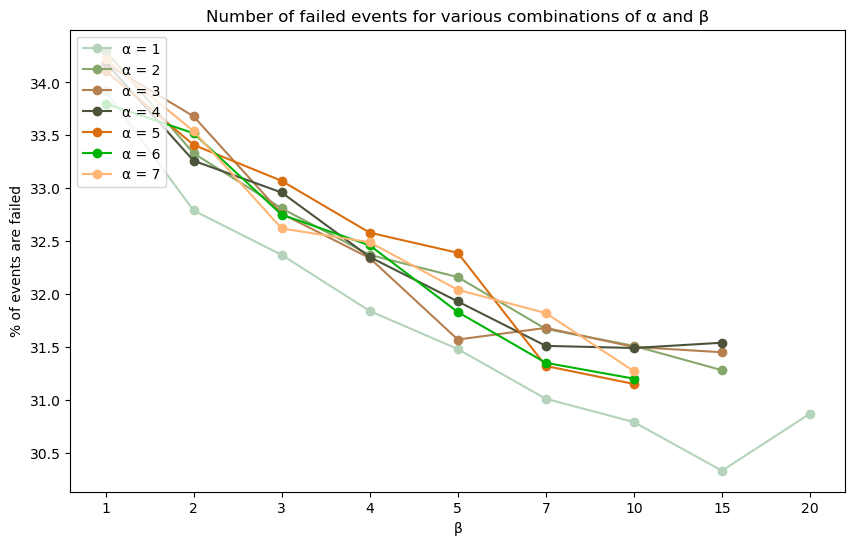

In [23]:
import matplotlib.ticker as ticker

# Assuming 'df' is your DataFrame
# Pivot your DataFrame as needed (if it is not already in the right format)
# Define the specific order of 'b' values you want to display on the x-axis
b_order = ['1', '2', '3', '4', '5', '7', '10', '15', '20']  # Adjust this list as needed

# Filter and convert 'b' to int for comparison, then set it as the DataFrame index
df1 = df[df['b'].astype(int).isin([int(x) for x in b_order])]
df1['b'] = pd.Categorical(df1['b'], categories=b_order, ordered=True)
df1.sort_values('b', inplace=True)
df1 = df1[df1['a'].astype(int) < 10]
df1 = df1[df1['b'].astype(int) < 21]
pivoted_df = df1.pivot(index='b', columns='a', values='Lost trips percentage')

colors = ['#B4D3BA', '#86A86B', '#B57F50', '#4B543B', '#DB6F10', '#00B307', '#FFB674', '#000000']

# Start plotting
fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the size as needed

# Plot each column

for i, column in enumerate(pivoted_df.columns):
    color = colors[i % len(colors)]  # Cycle through the color list
    ax.plot(pivoted_df.index, pivoted_df[column], marker='o', color=color, label=f'α = {column}')

# Customize the plot to match the uploaded image
ax.set_title('Number of failed events for various combinations of α and β')
ax.set_xlabel('β')
ax.set_ylabel('% of events are failed')
ax.legend(loc='upper left')

# It looks like the original plot uses a specific tick locator for the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Show the plot
plt.show()

In [1]:
import matplotlib.ticker as ticker

# Assuming 'df' is your DataFrame
# Pivot your DataFrame as needed (if it is not already in the right format)
# Define the specific order of 'b' values you want to display on the x-axis
b_order = ['1', '2', '3', '4', '5', '7', '10', '15', '20']  # Adjust this list as needed

# Filter and convert 'b' to int for comparison, then set it as the DataFrame index
df1 = df[df['b'].astype(int).isin([int(x) for x in b_order])]
df1['b'] = pd.Categorical(df1['b'], categories=b_order, ordered=True)
df1.sort_values('b', inplace=True)
df1 = df1[df1['a'].astype(int) < 10]
df1 = df1[df1['b'].astype(int) < 21]
pivoted_df = df1.pivot(index='b', columns='a', values='avg_solution_time')

colors = ['#B4D3BA', '#86A86B', '#B57F50', '#4B543B', '#DB6F10', '#00B307', '#FFB674']

# Start plotting
fig, ax = plt.subplots(figsize=(10, 6))  # You can adjust the size as needed

# Plot each column

for i, column in enumerate(pivoted_df.columns):
    color = colors[i % len(colors)]  # Cycle through the color list
    ax.plot(pivoted_df.index, pivoted_df[column], marker='o', color=color, label=f'α = {column}')

# Customize the plot to match the uploaded image
ax.set_title('Average solution time for each subproblem for various combinations of α and β')
ax.set_xlabel('β')
ax.set_ylabel('Average Solution time')
ax.legend(loc='upper left')

# It looks like the original plot uses a specific tick locator for the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Show the plot
plt.show()

NameError: name 'df' is not defined

## Cumulative trend

In [40]:
import os
import pandas as pd
def read_cumulated(policy_name, dir, case, file_or_folder):
    dfs = {}

    for root, dirs, files in os.walk(dir):
        # Filter directories within the root directory
        dirs[:] = [d for d in dirs if d.startswith(policy_name) or policy_name == 'all']
        # Only proceed if we're in a directory that matches the folder prefix
        if os.path.basename(root).startswith(policy_name) or policy_name == 'all':
            # Loop through each file in the directory
            for file in files:
                # Check if file starts with the prefix
                all_boolean = (case == 'all') and any(file.startswith(word) for word in ['Base', 'Collab', 'DoNothing', 'FF_'])
                if (file.startswith(case) or all_boolean) and file.endswith('.csv'):
                    file_path = os.path.join(root, file)
                    try:
                        # Load the file into a DataFrame
                        df = pd.read_csv(file_path, header=0, names=['Timestamp', 'Numbers'])
                        # Store the DataFrame in the dictionary using the path as a key
                        filename = os.path.basename(root) if file_or_folder == 'folder' else file
                        filename = case + '__' + os.path.basename(root) + '.csv' if file_or_folder == 'both' else filename
                        dfs[filename] = df
                    except Exception as e:
                        print(f"Failed to read {file_path}: {e}")
    return dfs

In [51]:
folder = 'results_new_threshold'
# folder = 'operator_radius'
# folder = 'results_inventory_balance'
# folder = 'results_num_vehicles'
# folder = 'results_policies'
# folder = 'results_extra_escooters'
# folders = ['results_thresholds', 'results_operator_radius_final', 'inventory_balance', 'results_num_vehicles']

case = 'cumulated_battery starvations'
# case = 'cumulated_escooter starvations'
# case = 'cumulated_bike starvations'
# case = 'cumulated_long congestions'
# cases = ['cumulated_battery starvations', 
#          'cumulated_escooter starvations', 
#          'cumulated_bike starvations', 
#          'cumulated_long congestions']

# policy = 'all'
# policy = 'Base'
# policy = 'Base_FF'
# policy = 'Collab2'
# policy = 'Collab3'
# policy = 'Collab4'
# policy = 'average_cumulated'
policies = [
            # 'Base',
            'Base_FF',
            # 'Collab2', 
            # 'Collab3', 
            # 'Collab4',
            # 'Do_Nothing',
            # 'FF_Only_Rebalance',
            # 'FF_Only_Swap'
            ]

### Calculate average over seeds

In [33]:
def latest_values_before_timestamp(df, unique_timestamps):
    results = []
    groups = df['Group'].unique()
    
    for timestamp in unique_timestamps:
        latest_values = []
        for group in groups:
            group_data = df[df['Group'] == group]
            filtered_data = group_data[group_data['Timestamp'] < timestamp]
            if not filtered_data.empty:
                latest_value = filtered_data.iloc[-1]['Numbers']
                latest_values.append(latest_value)
            else:
                latest_values.append(0)  # Use 0 if no value before the timestamp
        average_value = sum(latest_values) / len(latest_values)
        results.append((timestamp, average_value))
    
    return results

In [38]:
for policy in policies:
    for case in cases:
        dir = '/Users/isabellam/NTNU/H2023/Prosjektoppgave/fomo/policies/hlv_master/results/' + folder
        dataframes = read_cumulated(policy, dir, case, 'file')

        for filename, df in dataframes.items():
            df['Group'] = (df['Timestamp'] < df['Timestamp'].shift()).cumsum()

        dataframes_avg = {}
        for filename, df in dataframes.items():
            # Get all unique timestamps in ascending order
            unique_timestamps = sorted(df['Timestamp'].unique())

            # Calculate the average latest values before each timestamp
            averages = latest_values_before_timestamp(df, unique_timestamps)

            # Convert the results list to a DataFrame for better visualization
            averages_df = pd.DataFrame(averages, columns=['Timestamp', 'Average Value'])
            dataframes_avg[filename] = averages_df

        for filename, df in dataframes_avg.items():
            df.to_csv(f'{dir}/average_cumulated/{filename}', sep=',', header=False, encoding='utf-8')
            print(filename, 'is done')

KeyboardInterrupt: 

In [131]:
for case in cases:
    dir = '/Users/isabellam/NTNU/H2023/Prosjektoppgave/fomo/policies/hlv_master/results/' + folder
    dataframes, filenames = read_cumulated(policy, dir, case, 'file')

    for df in dataframes:
        df['Group'] = (df['Timestamp'] < df['Timestamp'].shift()).cumsum()

    def latest_values_before_timestamp(df, unique_timestamps):
        results = []
        groups = df['Group'].unique()
        
        for timestamp in unique_timestamps:
            latest_values = []
            for group in groups:
                group_data = df[df['Group'] == group]
                filtered_data = group_data[group_data['Timestamp'] < timestamp]
                if not filtered_data.empty:
                    latest_value = filtered_data.iloc[-1]['Numbers']
                    latest_values.append(latest_value)
                else:
                    latest_values.append(0)  # Use 0 if no value before the timestamp
            average_value = sum(latest_values) / len(latest_values)
            results.append((timestamp, average_value))
        
        return results


    dataframes_avg = []
    for df in dataframes:
        # Get all unique timestamps in ascending order
        unique_timestamps = sorted(df['Timestamp'].unique())

        # Calculate the average latest values before each timestamp
        averages = latest_values_before_timestamp(df, unique_timestamps)

        # Convert the results list to a DataFrame for better visualization
        averages_df = pd.DataFrame(averages, columns=['Timestamp', 'Average Value'])
        dataframes_avg.append(averages_df)

    for idx, df in enumerate(dataframes_avg):
        name = filenames[idx]
        df.to_csv(f'{dir}/average_cumulated/{name}', sep=',', header=False, encoding='utf-8')

ValueError: too many values to unpack (expected 2)

### One seed

In [52]:
dir = '/Users/isabellam/NTNU/H2023/Prosjektoppgave/fomo/policies/hlv_master/results/' + folder
dataframes = read_cumulated(policy, dir, case, 'file')
list(dataframes.keys())

['cumulated_battery starvations_swap_threshold_15_Base_FF.csv',
 'cumulated_battery starvations_swap_threshold_70_Base_FF.csv',
 'cumulated_battery starvations_swap_threshold_60_Base_FF.csv',
 'cumulated_battery starvations_swap_threshold_10_Base_FF.csv',
 'cumulated_battery starvations_swap_threshold_100_Base_FF.csv',
 'cumulated_battery starvations_swap_threshold_80_Base_FF.csv',
 'cumulated_battery starvations_swap_threshold_90_Base_FF.csv',
 'cumulated_battery starvations_swap_threshold_30_Base_FF.csv',
 'cumulated_battery starvations_swap_threshold_40_Base_FF.csv',
 'cumulated_battery starvations_swap_threshold_50_Base_FF.csv',
 'cumulated_battery starvations_swap_threshold_20_Base_FF.csv']

/var/folders/h1/k72gny2n6msgm2gmxh8f6d500000gn/T/ipykernel_18592/3172870149.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
/var/folders/h1/k72gny2n6msgm2gmxh8f6d500000gn/T/ipykernel_18592/3172870149.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
/var/folders/h1/k72gny2n6msgm2gmxh8f6d500000gn/T/ipykernel_18592/3172870149.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

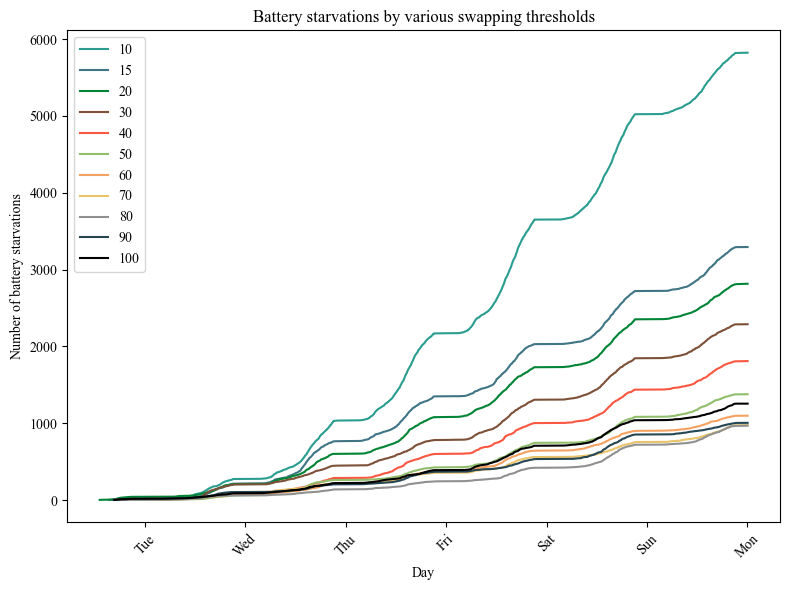

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))

dataframes_now = {}
for filename, df in dataframes.items():
    # Finding the first occurrence where the timestamp decreases
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    diffs = np.diff(df['Timestamp'].values)
    first_negative_index = np.where(diffs < np.timedelta64(0, 's'))[0]

    # Removing all rows after the first decrease in timestamp
    if first_negative_index.size > 0:
        df = df.iloc[:first_negative_index[0] + 1]
    dataframes_now[filename] = df

# Assuming dataframes_avg is a dictionary of DataFrames
common_index = pd.date_range(
    start=min(df['Timestamp'].min() for df in dataframes_now.values()), 
    end=max(df['Timestamp'].max() for df in dataframes_now.values()), 
    freq='T'  # or 'S' for second-level precision, 'H' for hour, etc.
)

# Reindex each DataFrame to the common index and interpolate missing values
for filename, df in dataframes_now.items():
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)
    df = df.reindex(common_index)
    df['Numbers'] = df['Numbers'].interpolate()
    dataframes_now[filename] = df

# Define desired order
desired_order = ['10', '15', '20', '30', '40', '50', '60', '70', '80', '90', '100']
colors = ['#2A9D8F', '#407585', '#028436', '#7D5139',  '#F95741', '#90BE6D', '#F4A261', '#E9C46A', '#909090', '#264653', '#000000']

# Plot each DataFrame in the desired order
for ind, order in enumerate(desired_order):
    for filename, df in dataframes_now.items():
        name = filename.split('_')[4]
        if order == name:
            plt.plot(df.index, df['Numbers'], label=name, color=colors[ind])

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a'))

plt.xlabel('Day')
plt.ylabel('Number of battery starvations')
plt.title('Battery starvations by various swapping thresholds')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average of seeds

In [7]:
for filename, df in dataframes.items():
    df['Group'] = (df['Timestamp'] < df['Timestamp'].shift()).cumsum()

In [8]:
def latest_values_before_timestamp(df, unique_timestamps):
    results = []
    groups = df['Group'].unique()
    
    for timestamp in unique_timestamps:
        latest_values = []
        for group in groups:
            group_data = df[df['Group'] == group]
            filtered_data = group_data[group_data['Timestamp'] < timestamp]
            if not filtered_data.empty:
                latest_value = filtered_data.iloc[-1]['Numbers']
                latest_values.append(latest_value)
            else:
                latest_values.append(0)  # Use 0 if no value before the timestamp
        average_value = sum(latest_values) / len(latest_values)
        results.append((timestamp, average_value))
    
    return results

In [9]:
dataframes_avg = {}
for filename, df in dataframes.items():
    # Get all unique timestamps in ascending order
    unique_timestamps = sorted(df['Timestamp'].unique())

    # Calculate the average latest values before each timestamp
    averages = latest_values_before_timestamp(df, unique_timestamps)

    # Convert the results list to a DataFrame for better visualization
    averages_df = pd.DataFrame(averages, columns=['Timestamp', 'Average Value'])
    dataframes_avg[filename] = averages_df

for filename, df in dataframes_avg.items():
    df.to_csv(f'{dir}/average_cumulated/{filename}', sep=',', header=False, encoding='utf-8')

KeyboardInterrupt: 

In [16]:
for filename, df in dataframes_avg.items():
    df.to_csv(f'{dir}/average_cumulated/{filename}', sep=',', header=False, encoding='utf-8')

In [147]:

# Assuming dataframes_avg is a dictionary of DataFrames
common_index = pd.date_range(
    start=min(df['Timestamp'].min() for df in dataframes_avg.values()), 
    end=max(df['Timestamp'].max() for df in dataframes_avg.values()), 
    freq='T'  # or 'S' for second-level precision, 'H' for hour, etc.
)

# Reindex each DataFrame to the common index and interpolate missing values
for filename, df in dataframes_avg.items():
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)
    df = df.reindex(common_index)
    df['Average Value'] = df['Average Value'].interpolate()
    dataframes_avg[filename] = df

# Plot each DataFrame
for filename, df in dataframes_avg.items():
    name = filename.split('_')[4]
    plt.plot(df.index, df['Average Value'], label=name)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Use AutoDateLocator for automatic tick frequency
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a'))

plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative number of battery starvations')
plt.title('Number of battery starvations with various battery swap thresholds')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: time data "2022-01-03 06:53:35" doesn't match format "%Y-%m-%d %H:%M:%S.%f", at position 757. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

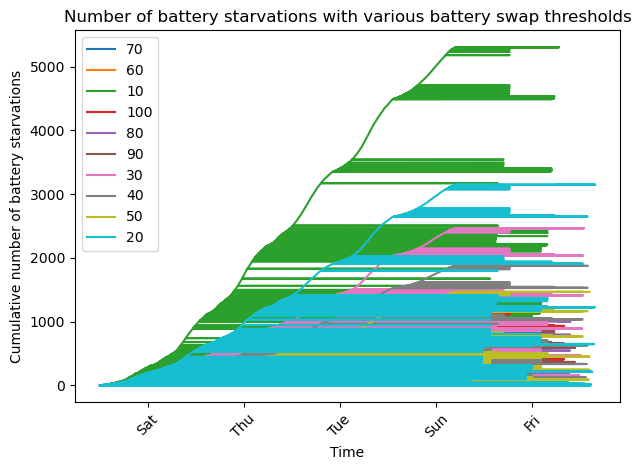

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Plot each DataFrame
for filename, df in dataframes_avg.items():
    name = filename.split('_')[4]
    plt.plot(df['Timestamp'], df['Average Value'], label=name)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Use AutoDateLocator for automatic tick frequency
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a'))

plt.xlabel('Time')
plt.ylabel('Cumulative number of battery starvations')
plt.title('Number of battery starvations with various battery swap thresholds')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Cumulative total failed events for each system

In [125]:
case1 = 'cumulated_battery starvations'
case2 = 'cumulated_escooter starvations'

# case1 = 'cumulated_bike starvations'
# case2 = 'cumulated_long congestions'

dir = '/Users/isabellam/NTNU/H2023/Prosjektoppgave/fomo/policies/hlv_master/results/' + folder
dataframes1, filenames1 = read_cumulated(policy, dir, case1, 'file')
dataframes2, filenames2 = read_cumulated(policy, dir, case2, 'file')

In [126]:
merged_dfs = []
for i in range(len(dataframes1)):
    # Merge the DataFrames on the 'timestamp' column with an outer join
    merged_df = pd.merge(dataframes1[i], dataframes2[i], on='Timestamp', how='outer', suffixes=('_file1', '_file2'))

    # Sort the merged DataFrame by timestamp to ensure correct forward filling
    merged_df = merged_df.sort_values('Timestamp')

    # Forward fill NaN values for each file's value column
    merged_df['Numbers_file1'] = merged_df['Numbers_file1'].ffill().fillna(0)
    merged_df['Numbers_file2'] = merged_df['Numbers_file2'].ffill().fillna(0)

    # Sum the cumulative values for matching timestamps
    merged_df['Numbers'] = merged_df['Numbers_file1'] + merged_df['Numbers_file2']

    # Drop the individual columns used for merging
    merged_df = merged_df[['Timestamp', 'Numbers']]
    merged_dfs.append(merged_df)

Locator attempting to generate 9924 ticks ([-451.0, ..., 9472.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9924 ticks ([-451.0, ..., 9472.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9924 ticks ([-451.0, ..., 9472.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9924 ticks ([-451.0, ..., 9472.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9924 ticks ([-451.0, ..., 9472.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9924 ticks ([-451.0, ..., 9472.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9924 ticks ([-451.0, ..., 9472.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9924 ticks ([-451.0, ..., 9472.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9924 ticks ([-451.0, ..., 9472.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 9924 ticks ([-4

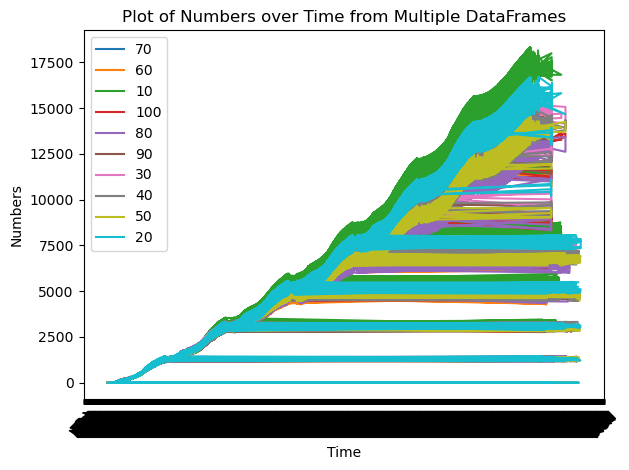

In [127]:
# Plot each DataFrame
for idx, df in enumerate(merged_dfs):
    name = filenames[idx].split('_')[4]
    plt.plot(df['Timestamp'], df['Numbers'], label=name)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a'))

plt.xlabel('Time')
plt.ylabel('Numbers')
plt.title('Plot of Numbers over Time from Multiple DataFrames')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plotting of swap threshold

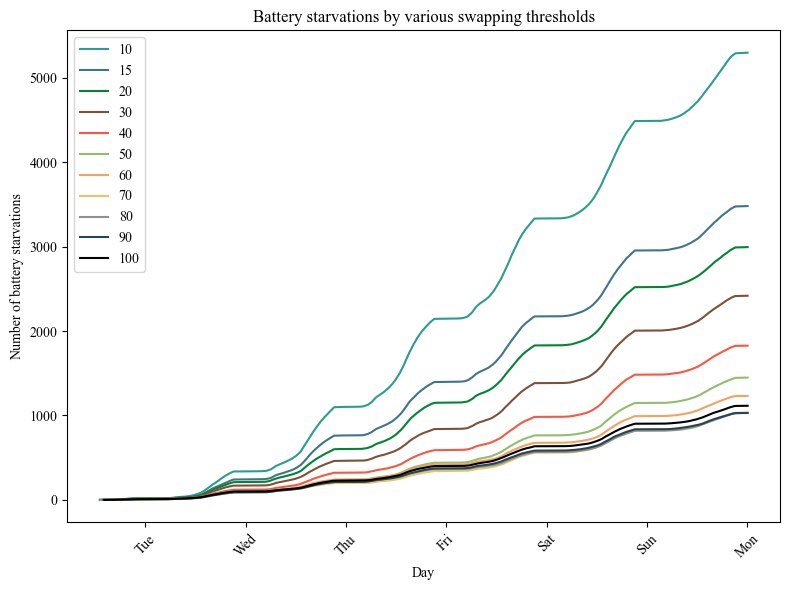

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

def read_cumulated(policy_name, dir, case, file_or_folder):
    dfs = {}

    for root, dirs, files in os.walk(dir):
        # Filter directories within the root directory
        dirs[:] = [d for d in dirs if d.startswith(policy_name) or policy_name == 'all']
        # Only proceed if we're in a directory that matches the folder prefix
        if os.path.basename(root).startswith(policy_name) or policy_name == 'all':
            # Loop through each file in the directory
            for file in files:
                # Check if file starts with the prefix
                all_boolean = (case == 'all') and any(file.startswith(word) for word in ['Base', 'Collab', 'DoNothing', 'FF_'])
                if (file.startswith(case) or all_boolean) and file.endswith('.csv'):
                    file_path = os.path.join(root, file)
                    try:
                        # Load the file into a DataFrame
                        df = pd.read_csv(file_path, header=0, names=['Timestamp', 'Numbers'])
                        # Store the DataFrame in the dictionary using the path as a key
                        filename = os.path.basename(root) if file_or_folder == 'folder' else file
                        dfs[filename] = df
                    except Exception as e:
                        print(f"Failed to read {file_path}: {e}")
    return dfs

dir = '/Users/isabellam/NTNU/H2023/Prosjektoppgave/fomo/policies/hlv_master/results/results_new_threshold'
dataframes = read_cumulated('average_cumulated', dir, 'cumulated_battery starvations', 'file')

fig, ax = plt.subplots(figsize=(8, 6))

dataframes_now = {}
for filename, df in dataframes.items():
    # Finding the first occurrence where the timestamp decreases
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    diffs = np.diff(df['Timestamp'].values)
    first_negative_index = np.where(diffs < np.timedelta64(0, 's'))[0]

    # Removing all rows after the first decrease in timestamp
    if first_negative_index.size > 0:
        df = df.iloc[:first_negative_index[0] + 1]
    dataframes_now[filename] = df

# Assuming dataframes_avg is a dictionary of DataFrames
common_index = pd.date_range(
    start=min(df['Timestamp'].min() for df in dataframes_now.values()), 
    end=max(df['Timestamp'].max() for df in dataframes_now.values()), 
    freq='T'  # or 'S' for second-level precision, 'H' for hour, etc.
)

# Reindex each DataFrame to the common index and interpolate missing values
for filename, df in dataframes_now.items():
    df = df.copy()  # To avoid SettingWithCopyWarning
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)
    
    # Remove duplicate indices by taking the mean of the duplicates
    df = df.groupby(df.index).mean()
    
    df = df.reindex(common_index)
    df['Numbers'] = df['Numbers'].interpolate()
    dataframes_now[filename] = df

# Define desired order
desired_order = ['10', '15', '20', '30', '40', '50', '60', '70', '80', '90', '100']
colors = ['#2A9D8F', '#407585', '#028436', '#7D5139',  '#F95741', '#90BE6D', '#F4A261', '#E9C46A', '#909090', '#264653', '#000000']

# Plot each DataFrame in the desired order
for ind, order in enumerate(desired_order):
    for filename, df in dataframes_now.items():
        name = filename.split('_')[4]
        if order == name:
            plt.plot(df.index, df['Numbers'], label=name, color=colors[ind])

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a'))

plt.xlabel('Day')
plt.ylabel('Number of battery starvations')
plt.title('Battery starvations by various swapping thresholds')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()